##  Compiled by  : Saurabh ## 

In [1]:
!nvidia-smi

Mon Sep  2 00:10:21 2024       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.90.07              Driver Version: 550.90.07      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA A100-SXM4-80GB          On  |   00000000:00:05.0 Off |                    0 |
| N/A   44C    P0             59W /  400W |       1MiB /  81920MiB |      0%      Default |
|                                         |                        |             Disabled |
+-----------------------------------------+-----

In [2]:
# !pip install -Uqqq pip --progress-bar off
# !pip install -qqq git+https://github.com/huggingface/diffusers.git@d8a16635f47ac455abd61879bcc6be32dfeaa561
# !pip install -qqq peft==0.12.0 --progress-bar off
# !pip install -U python-dotenv

# !pip install git+https://github.com/huggingface/diffusers.git

!pip install torch	torchvision	safetensors	git+https://github.com/huggingface/diffusers.git	transformers	lycoris-lora==1.8.3	flatten_json	pyyaml	oyaml	tensorboard	kornia	invisible-watermark	einops	accelerate	toml	albumentations	pydantic	omegaconf	k-diffusion	open_clip_torch	timm	prodigyopt	controlnet_aux==0.0.7	python-dotenv	bitsandbytes	hf_transfer	lpips	pytorch_fid	optimum-quanto	sentencepiece	huggingface_hub	peft

!pip install dotenv wrapper

In [3]:
import matplotlib
import matplotlib.pyplot as plt
import torch
from diffusers import FluxPipeline

SEED = 42
GENERATOR = torch.Generator("cpu").manual_seed(SEED)

In [4]:
from huggingface_hub import login
import os
import json


# HUGGING_FACE_HUB_TOKEN = os.getenv("HUGGING_FACE_HUB_TOKEN")

# print("HUGGING_FACE_HUB_TOKEN", HUGGING_FACE_HUB_TOKEN) 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_test

try:
    login() 
    print("Login successful!")
except Exception as e:
    print(f"Login failed: {e}") 

Login successful!


In [5]:
pipe = FluxPipeline.from_pretrained(
    "black-forest-labs/FLUX.1-dev", torch_dtype=torch.bfloat16
)
pipe.to("cuda")

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

You set `add_prefix_space`. The tokenizer needs to be converted from the slow tokenizers


Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

FluxPipeline {
  "_class_name": "FluxPipeline",
  "_diffusers_version": "0.31.0.dev0",
  "_name_or_path": "black-forest-labs/FLUX.1-dev",
  "scheduler": [
    "diffusers",
    "FlowMatchEulerDiscreteScheduler"
  ],
  "text_encoder": [
    "transformers",
    "CLIPTextModel"
  ],
  "text_encoder_2": [
    "transformers",
    "T5EncoderModel"
  ],
  "tokenizer": [
    "transformers",
    "CLIPTokenizer"
  ],
  "tokenizer_2": [
    "transformers",
    "T5TokenizerFast"
  ],
  "transformer": [
    "diffusers",
    "FluxTransformer2DModel"
  ],
  "vae": [
    "diffusers",
    "AutoencoderKL"
  ]
}

In [6]:
def generate_images(
    prompt: str,
    guidance_scale: float = 3.5,
    n_steps: int = 30,
    lora_scale: float = 1.0,
    n_images: int = 1,
):
    return pipe(
        prompt=prompt,
        width=1024,
        height=768,
        guidance_scale=guidance_scale,
        output_type="pil",
        num_inference_steps=n_steps,
        max_sequence_length=512,
        num_images_per_prompt=n_images,
        generator=torch.Generator("cpu").manual_seed(SEED),
        joint_attention_kwargs={"scale": lora_scale},
    ).images

In [79]:
prompt = """Create a highly detailed and realistic photo of a beautiful woman with a warm, inviting smile and black hairs .

The background should be blurred, ensuring full focus remains on her face and full body.
"""

  0%|          | 0/30 [00:00<?, ?it/s]

CPU times: user 12.1 s, sys: 1.24 s, total: 13.4 s
Wall time: 12 s


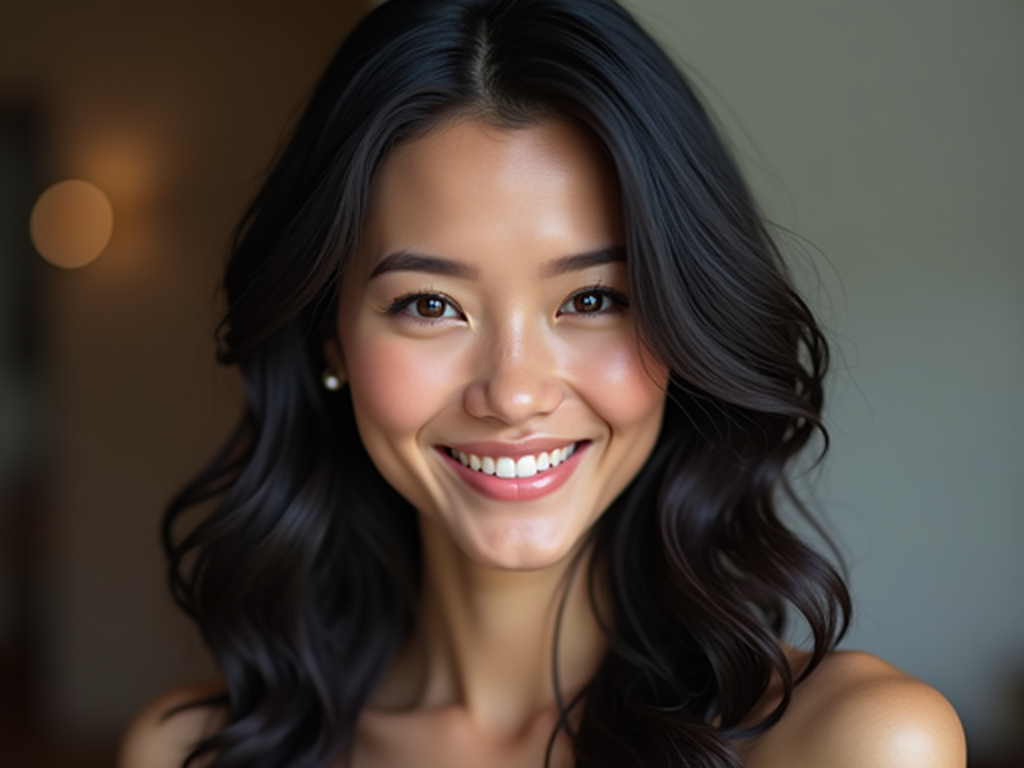

In [80]:
%%time

generate_images(prompt)[0]

## Generation Settings

In [81]:
%%time
steps = [5, 10, 15, 20, 25, 30]

images = []
for n_steps in steps:
    images.append(generate_images(prompt, n_steps=n_steps)[0])

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

CPU times: user 42.5 s, sys: 4.76 s, total: 47.2 s
Wall time: 42.7 s


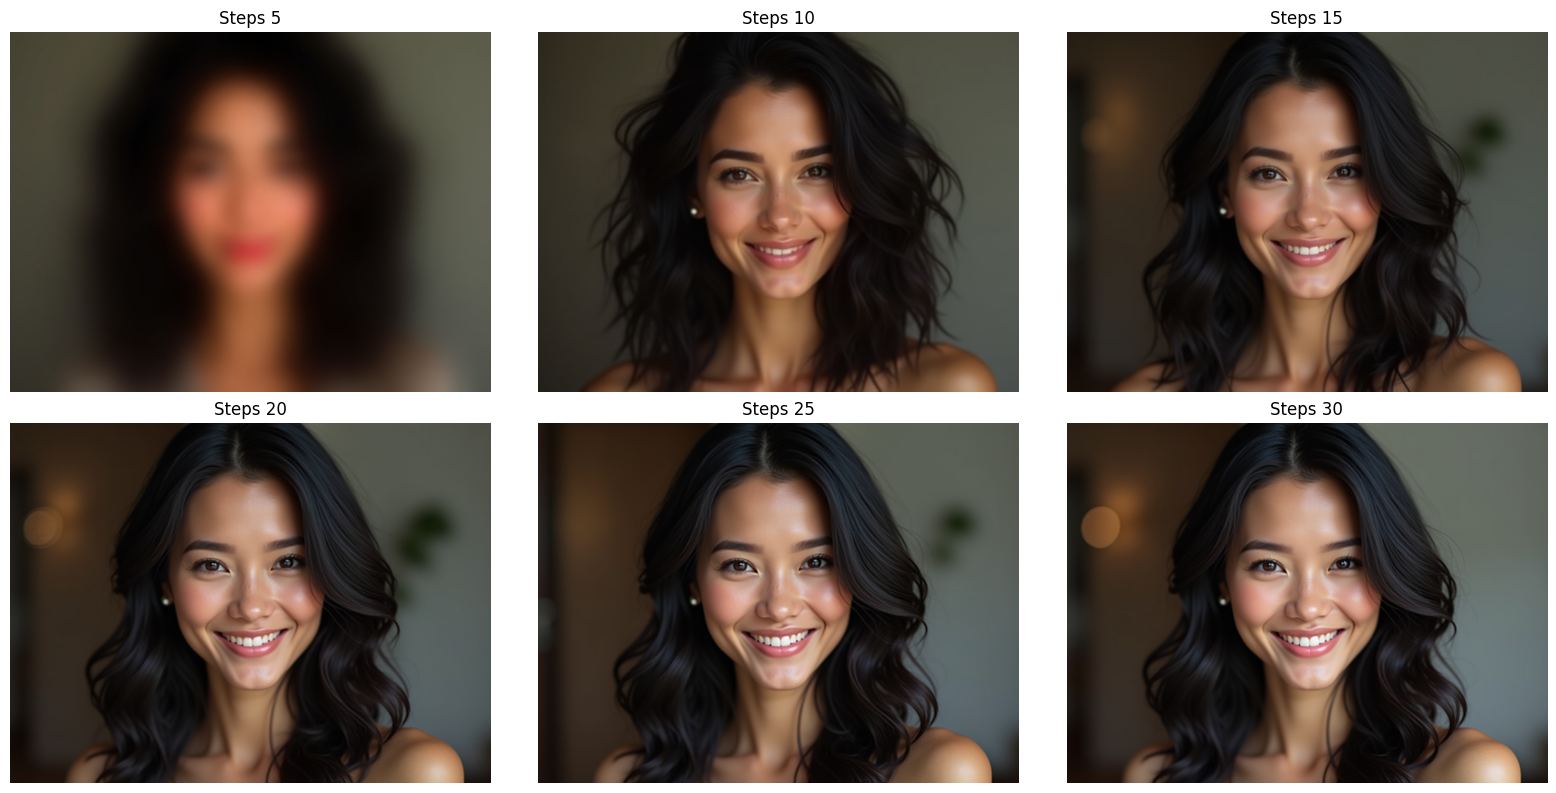

In [82]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(16, 8))

for ax, img, n_steps in zip(axes.flatten(), images, steps):
    ax.imshow(img)
    ax.axis("off")
    ax.set_title(f"Steps {n_steps}")

plt.tight_layout();

In [83]:
guidances = [0, 2, 4, 6, 8, 10]

In [ ]:
%%time

images = []
for guidance in guidances:
    images.append(generate_images(prompt, guidance_scale=guidance)[0])

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(12, 8))

for ax, img, guidance in zip(axes.flatten(), images, guidances):
    ax.imshow(img)
    ax.axis("off")
    ax.set_title(f"Guidance {guidance}")
plt.tight_layout();

## Examples

In [58]:
prompt = """
A mythical, cute, cartoonish hydra with a single, large head, covered in soft purple scales.
The hydra has big, expressive eyes and a wide, friendly smile, exuding a cuddly and approachable demeanor.
The body is chubby and playful, with short, rounded limbs and a small, wagging tail.
The background features a whimsical, enchanted forest.
"""

  0%|          | 0/30 [00:00<?, ?it/s]

CPU times: user 12.1 s, sys: 1.28 s, total: 13.4 s
Wall time: 12.1 s


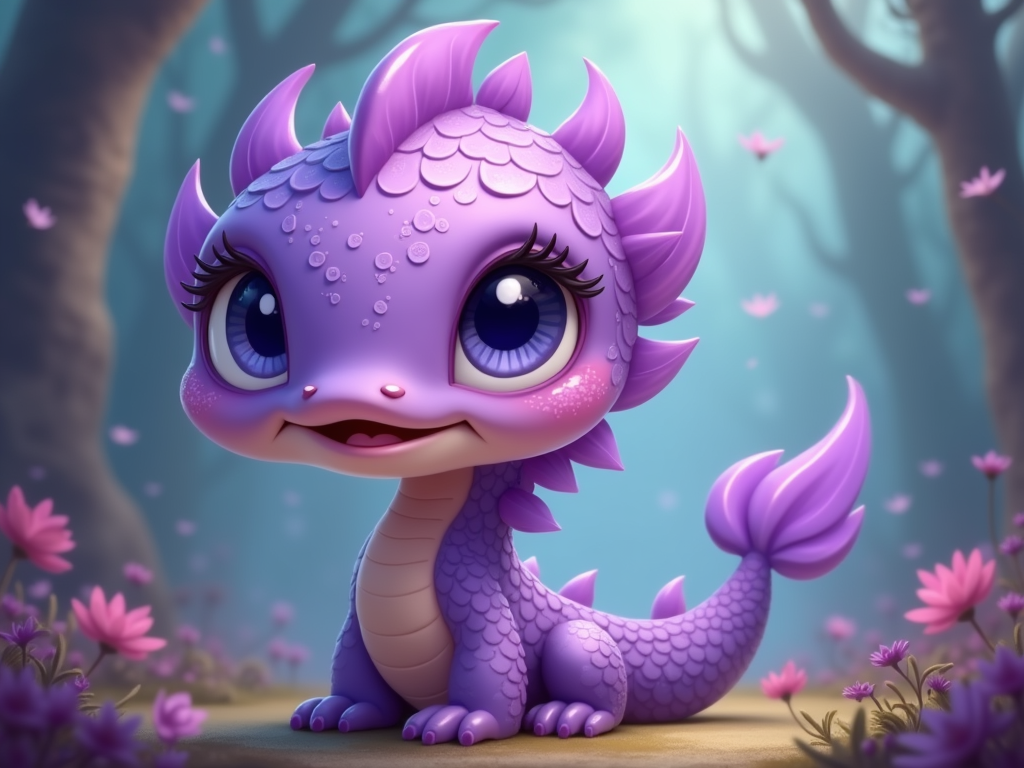

In [59]:
%%time

generate_images(prompt)[0]

## Multiple Images

In [60]:
prompt = """
Two adorable penguins holding hands on a sunny beach.
One penguin has a small bowtie, while the other wears a colorful sun hat.
They stand on soft golden sand with gentle ocean waves lapping in the background.
The sky is bright and clear, with a few fluffy clouds, and a seashell lies nearby, adding to the playful, heartwarming scene.
"""

In [61]:
%%time
images = generate_images(prompt, n_images=4)

  0%|          | 0/30 [00:00<?, ?it/s]

CPU times: user 39 s, sys: 6.84 s, total: 45.8 s
Wall time: 44.5 s


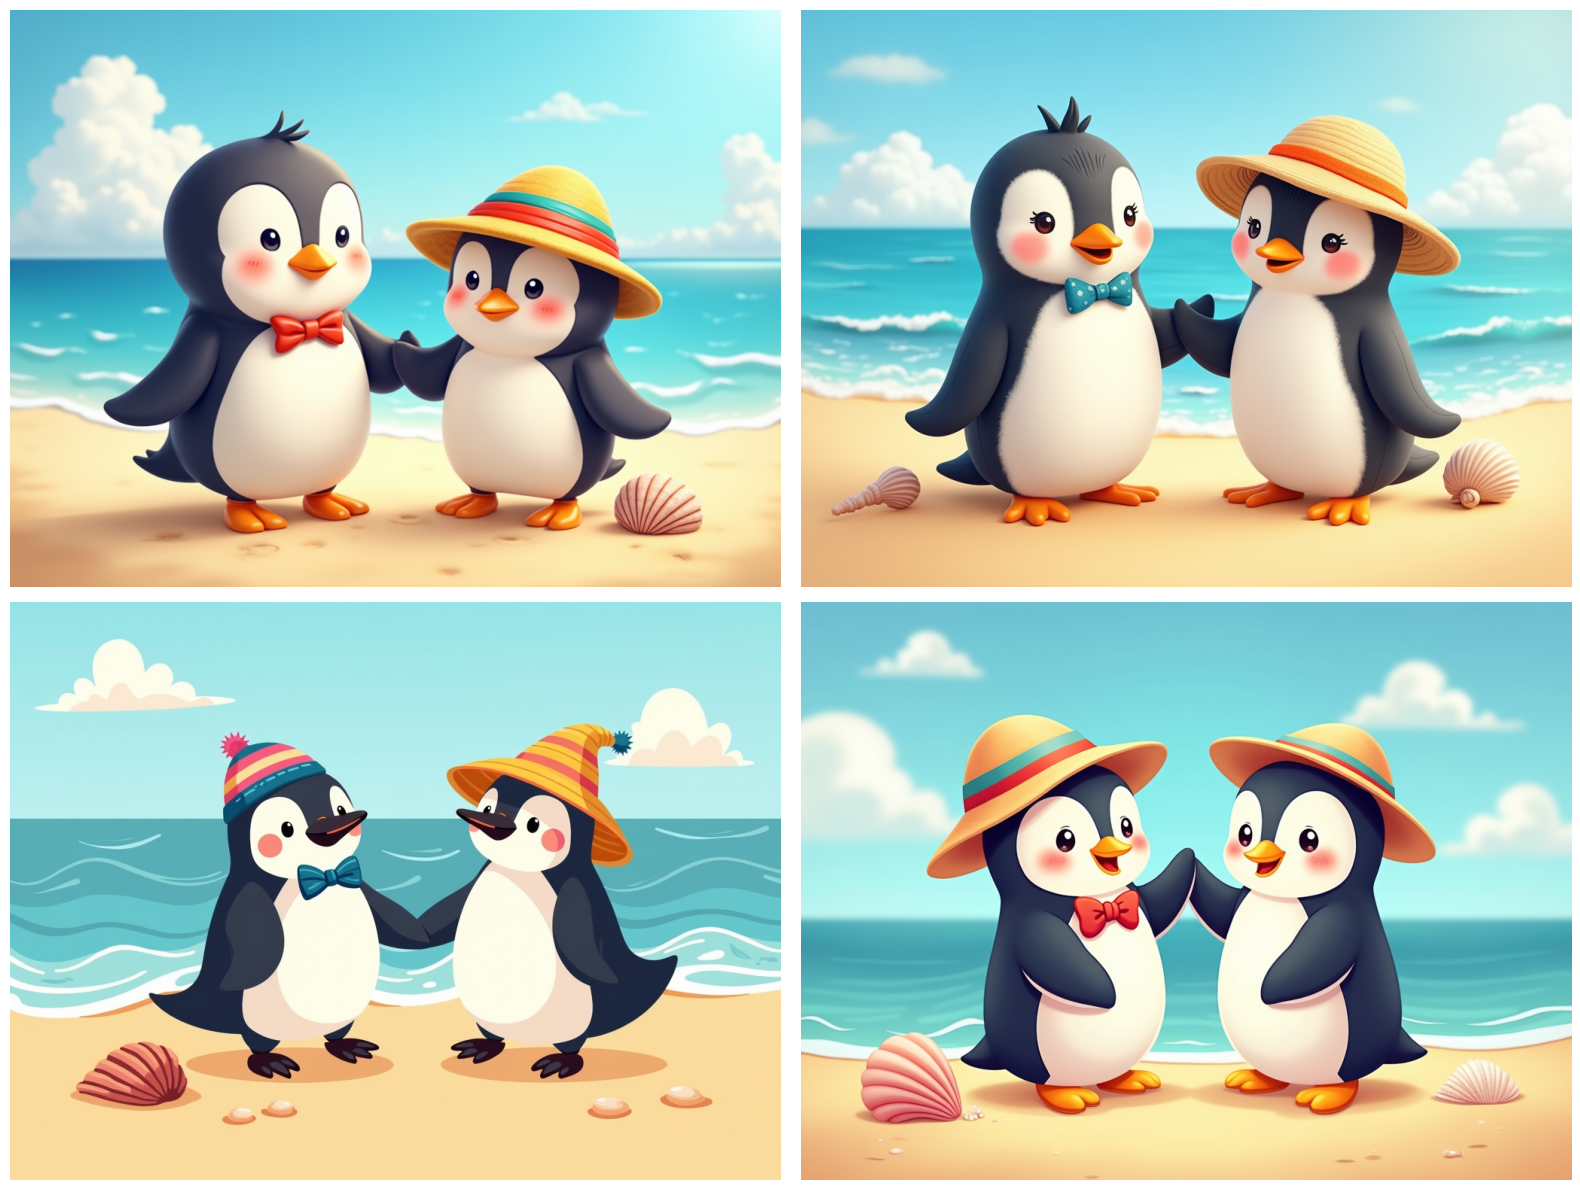

In [62]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16, 12))

for ax, img in zip(axes.flatten(), images):
    ax.imshow(img)
    ax.axis("off")
plt.tight_layout();

## Photorealism (LoRA adapter)

In [63]:
pipe.load_lora_weights(
    pretrained_model_name_or_path_or_dict="XLabs-AI/flux-RealismLora",
    weight_name="lora.safetensors",
)

In [64]:
prompt = """Create a highly detailed and realistic portrait of a beautiful woman with a warm, inviting smile.
Her expression should convey a subtle, yet captivating sense of allure, with her gaze directed straight at the camera.
Her eyes should sparkle with a mix of charm and confidence, drawing the viewer in.
The background should be blurred, ensuring full focus remains on her expressive face.
"""

In [ ]:
%%time

generate_images(prompt)[0]

In [66]:
prompt = """
A baby blue and turquoise excavator parked at a bustling Slavic street repair site.
The excavator has a friendly, compact design with oversized, rounded features.
The surrounding scene includes cobblestone streets, traditional Slavic architecture with colorful facades,
and construction tools scattered around. The background shows a vibrant urban setting with people and
vintage buildings, adding a lively, authentic touch
"""

In [67]:
scales = [0.0, 0.25, 0.5, 1.0]

In [ ]:
%%time
images = []

for scale in scales:
    images.append(generate_images(prompt, lora_scale=scale)[0])

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16, 12))

for ax, img, scale in zip(axes.flatten(), images, scales):
    ax.imshow(img)
    ax.axis("off")
    ax.set_title(f"Lora scale {scale}")
plt.tight_layout();

In [70]:
prompt = """A stunning modern oceanfront house with sleek architecture and expansive glass windows,
offering a breathtaking view of the sparkling water. The house features clean lines, an open layout, and a spacious deck.
Surrounding it is lush, vibrant greenery with flourishing flora under a bright, sunny sky.
The scene captures a warm, inviting atmosphere with the shimmering ocean in the background.
"""

In [ ]:
%%time
images = generate_images(prompt, n_images=4)

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16, 12))

for ax, img in zip(axes.flatten(), images):
    ax.imshow(img)
    ax.axis("off")
plt.tight_layout();

In [73]:
prompt = """A modern Scandinavian-inspired bedroom with a minimalistic design featuring white furniture.
The room is bathed in natural sunlight streaming through two large windows, creating a bright, airy atmosphere.
Incorporate subtle blue accents in decorative pillows, a rug, or a piece of wall art to add pops of color.
The space is uncluttered, with sleek lines and an emphasis on functionality.
"""

In [ ]:
%%time
images = generate_images(prompt, n_images=4)

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16, 12))

for ax, img in zip(axes.flatten(), images):
    ax.imshow(img)
    ax.axis("off")
plt.tight_layout();

In [76]:
prompt = """A charming baby unicorn avatar for a habit tracker app.
The unicorn is small, with a soft pastel color palette featuring light pink and lavender.
It has a sparkling, multicolored mane and a golden horn, with big, expressive eyes and a friendly smile.
The unicorn’s pose is playful and engaging, perfect for motivating users and adding a touch of magic to their daily tracking.
"""

In [ ]:
%%time
images = generate_images(prompt, guidance_scale=2.0, n_images=4)

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16, 12))

for ax, img in zip(axes.flatten(), images):
    ax.imshow(img)
    ax.axis("off")
plt.tight_layout();